<img src="https://www.peoplecert.org/-/media/peoplecert/images/tc-images/peoplelogy-skill/peopleogy-logo.png?h=966&iar=0&w=2231&hash=28DD04BA69030200BD7ADEA1370449B3" style="float: left; margin: 20px; height: 55px">

# Data Pre-Processing & EDA
_Author: Elissa Azhari_

---

### Milestones:
- **Data Pre-processing/ Data cleaning**
- **Feature Engineering**
- Model Selection
- Model Training (Train-test)
- Model Deployment
- Monitoring Data & Preparing Report

## Capstone Project: Identifying Quality of Apples

---

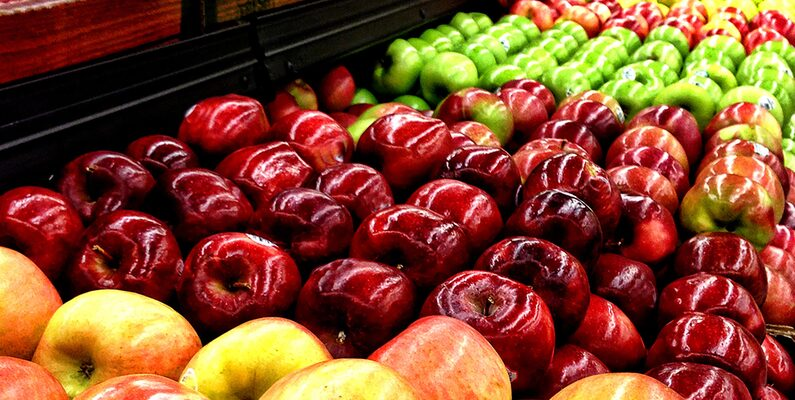

## Problem Statement

Inconsistency fruit quality sold in market which contributes to food insecurity.

## Objective

A predictive model that indentifies the quality of apple crops by learning the pre-existing datas. Prediction model will help to sustain the quality of apples in the supermarket and ensuring food security. The end product of the capstone project is a report that concludes the predictive model information.

## Project Flowchart

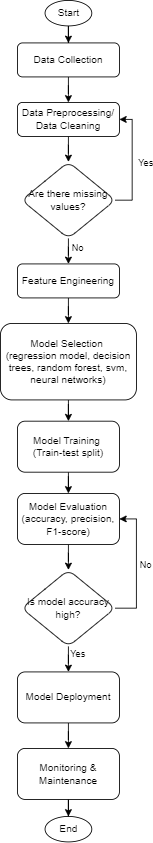

## Project Milestones

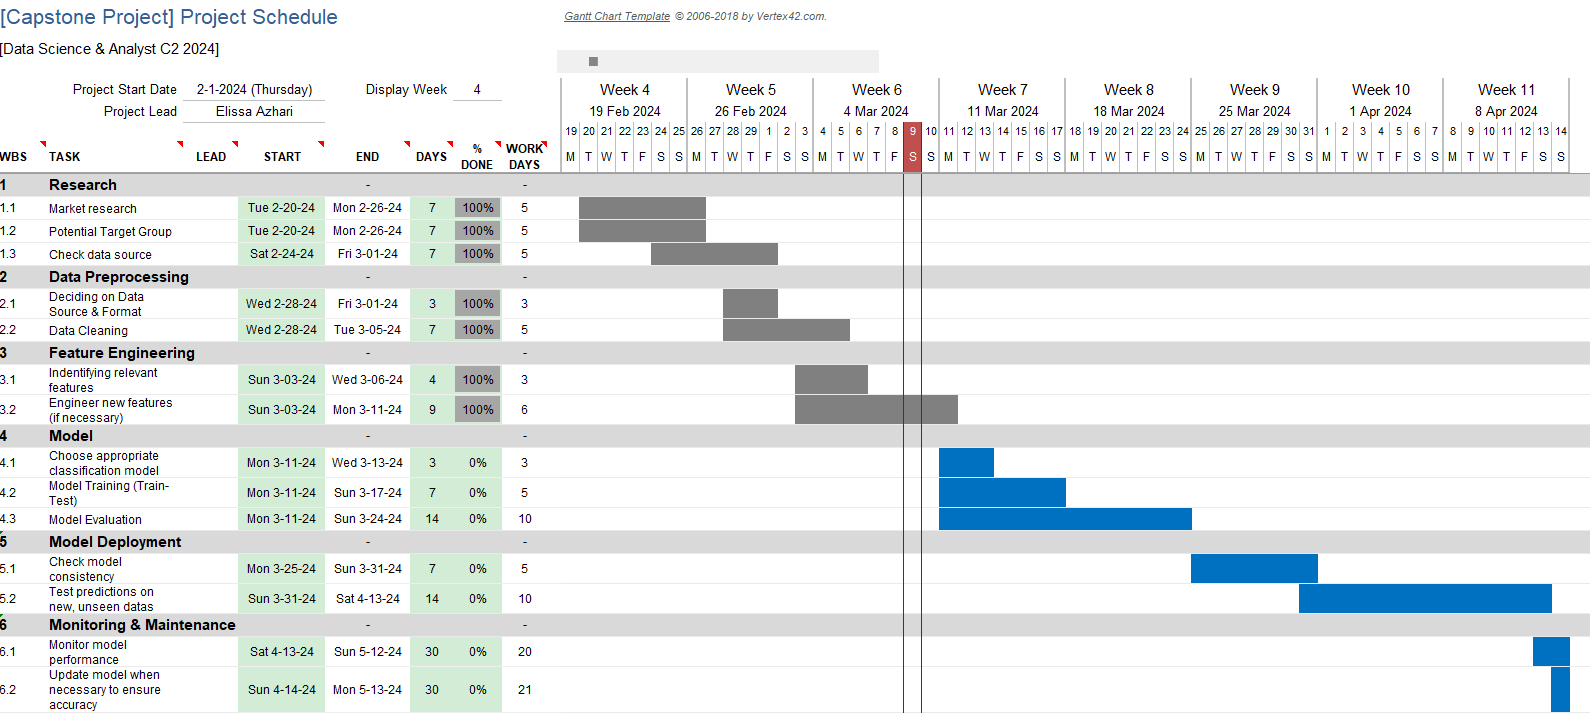

## Data Pre-Processing / Cleaning

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
apples = pd.read_csv('apple_quality.csv')
apples.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [4]:
# Checking info of the dataframe
apples.info()

# Acidity should be float64 but it is object..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
# Checking for null value
apples.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
# Before data cleaning
apples.shape

(4001, 9)

In [7]:
# Since there are null values, we need to either drop it or replace value!
# in this case, it is found that the 4001 row was falsely read as data, when there is only a credit line of the data owner.
# Therefore, I will drop.na the 4001th row it.

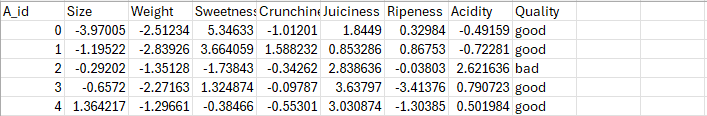

-----
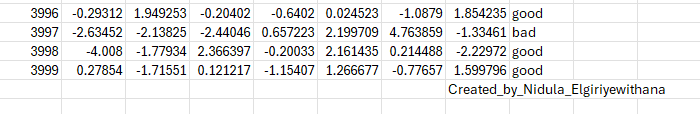

In [8]:
apples.dropna(inplace=True)
apples.shape

(4000, 9)

In [9]:
apples.info()

# Acidity is still object. Need to convert it into float64

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
# Converting Acidity to float
apples['Acidity'] = apples['Acidity'].astype(float)

# Converting Apple id (A_id) to object
apples['A_id'] = apples['A_id'].astype(object)

# Converting Quality to int, whereby.. Good = 1, Bad = 0
apples['Quality'] = apples['Quality'].replace(['good', 'bad'],
                        [1, 0])

In [11]:
apples.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0  0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1  1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2  2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3  3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4  4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality  
0 -0.491590        1  
1 -0.722809        1  
2  2.621636        0  
3  0.790723        1  
4  0.501984        1

In [12]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   object 
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 312.5+ KB


In [13]:
# Check again to see if there is still null values
apples.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

We can conclude that data is cleaned.

### Describing summary statistics for columns

In [14]:
apples.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  
mean      0.498277     0.076877     0.501000  
std       1.874427     2.110270     0.500062  
min      -5.864599    -7.010538     0.000000  
25%      -0.771677    -1.377424     0.000000  
50%       0.503445     0.022609     1.000000  
75%       1.766212     1.510493     1.000000  
max       7.237837     7.404736     1.000000

In [15]:
apples.groupby('Quality').mean(numeric_only=True).T

Quality             0         1
Size        -0.974358 -0.033553
Weight      -0.991828 -0.987274
Sweetness   -0.959195  0.016287
Crunchiness  1.002871  0.968154
Juiciness    0.008871  1.013356
Ripeness     0.994646  0.003890
Acidity      0.093151  0.060668

In [23]:
# Counting the ratio of "Good" and "Bad"
value_counts = apples['Quality'].value_counts()

# Print the counts
print("Count of 0s:", value_counts[0])
print("Count of 1s:", value_counts[1])

Count of 0s: 1996
Count of 1s: 2004


### _Note: A_id is a unique identity and will not be treated as numeric_

## Checking for outliers

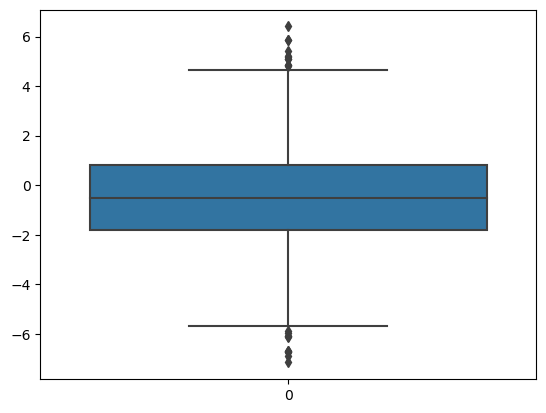

In [171]:
sns.boxplot(apples.Size);

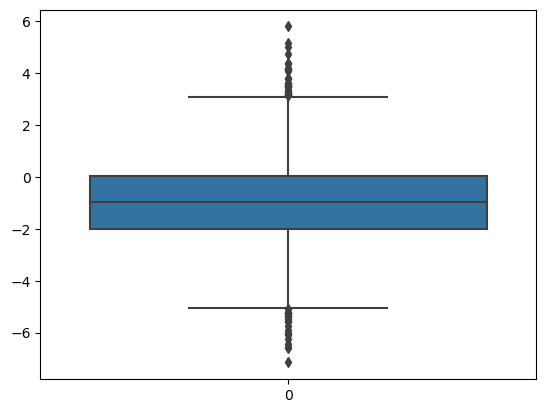

In [172]:
sns.boxplot(apples.Weight);

## Correlation Matrices

In [173]:
apples.corr(numeric_only=True)

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Quality      0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity   Quality  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Quality     -0.007697  1.000000

<Axes: >

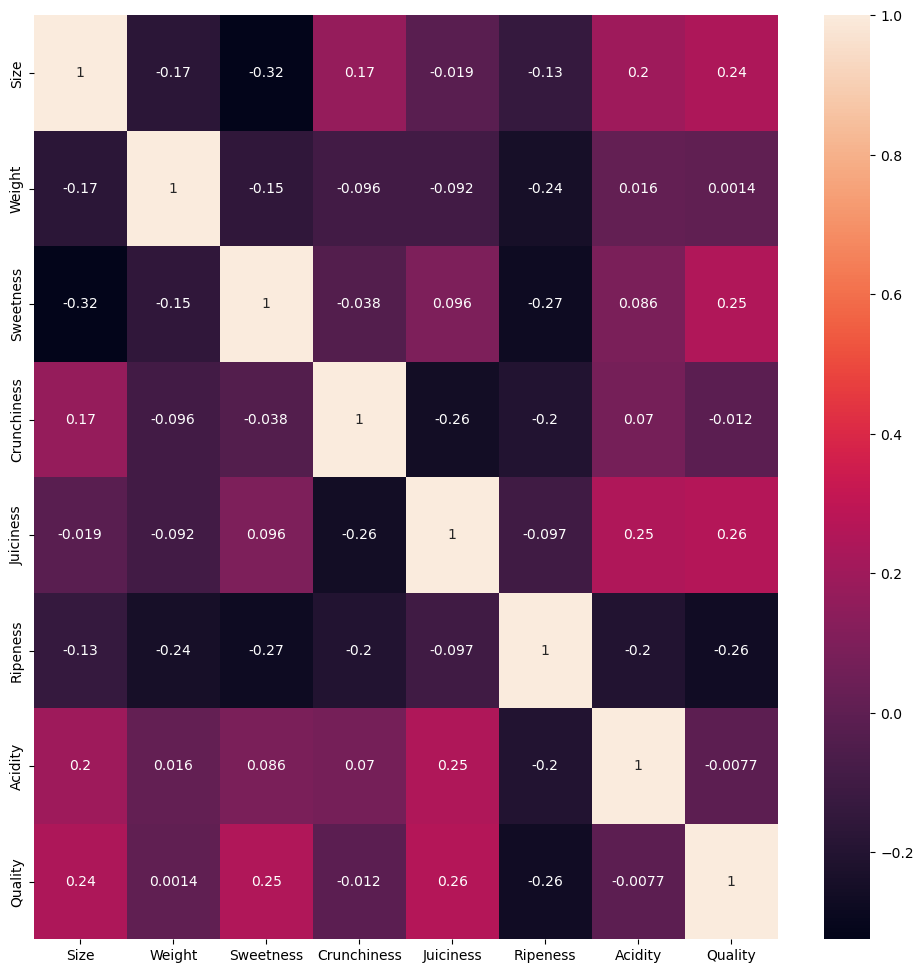

In [174]:
plt.figure(figsize=(12,12))
sns.heatmap(apples.corr(numeric_only=True), annot=True)

# EDA: Pair Plot

In [175]:
# Standard import
import seaborn as sns

# modeling imports
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

C:\Users\Elissa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


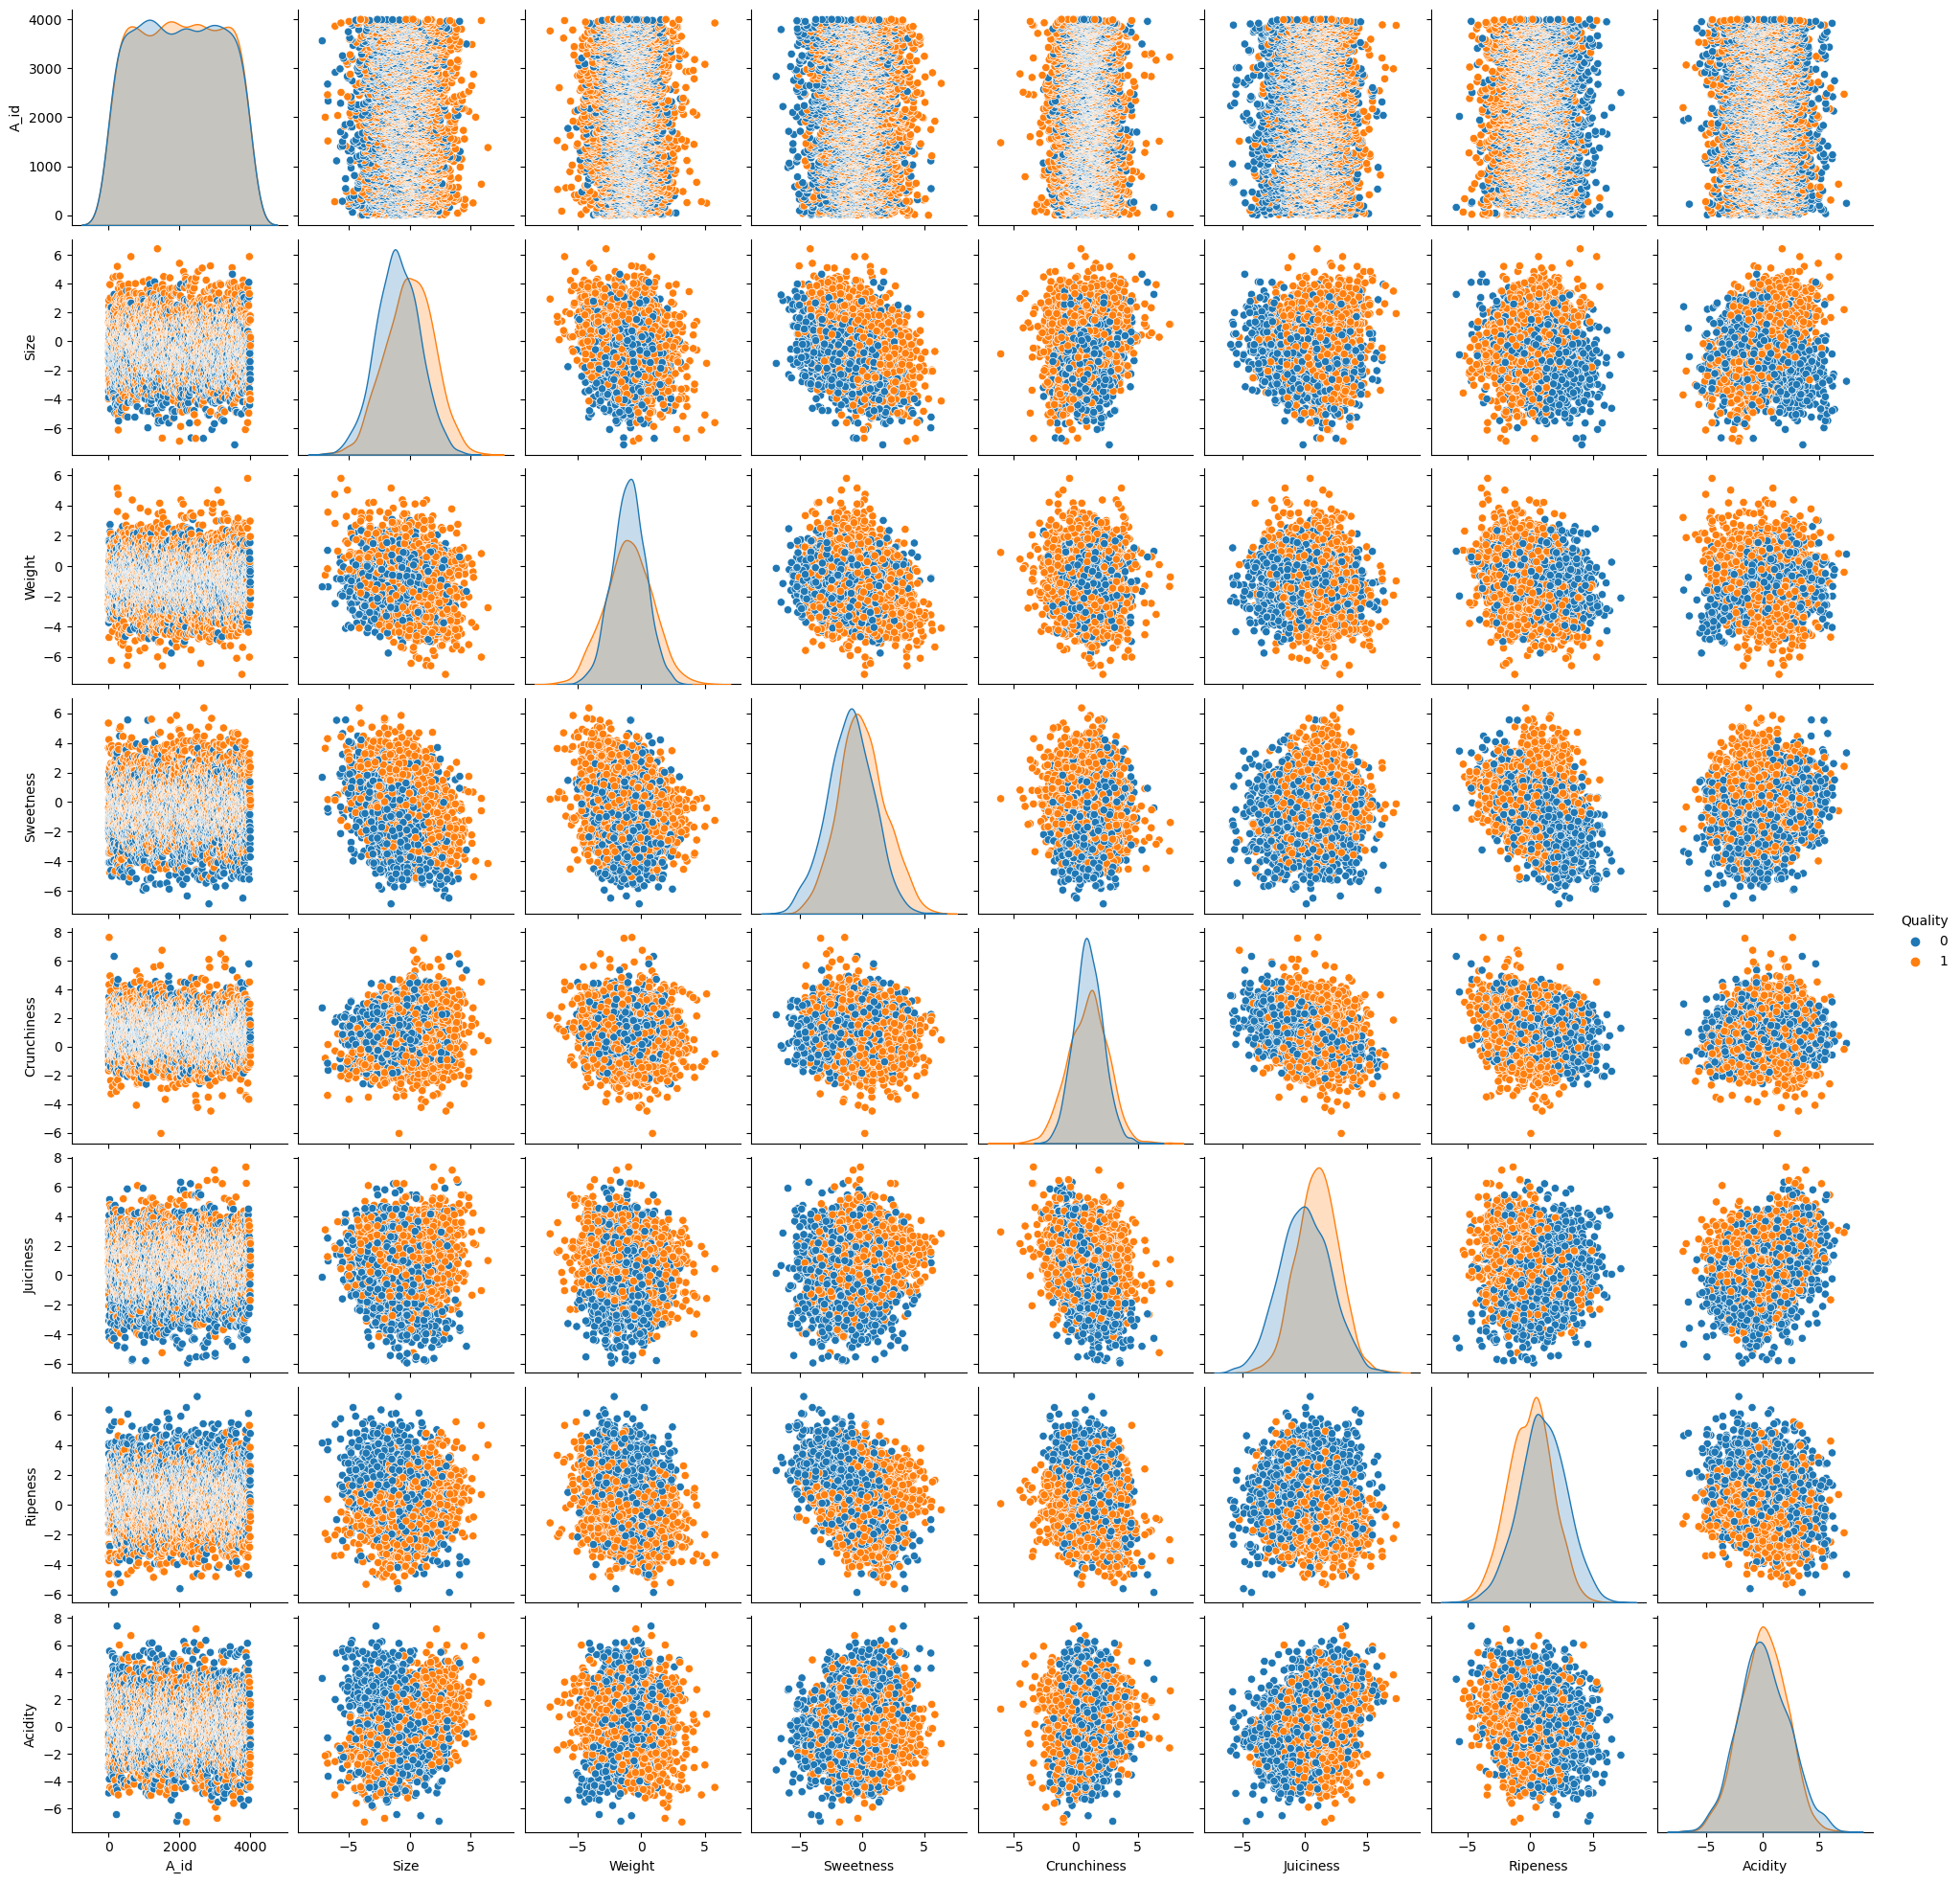

In [176]:
sns.pairplot(apples, hue ='Quality')
plt.show()

C:\Users\Elissa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


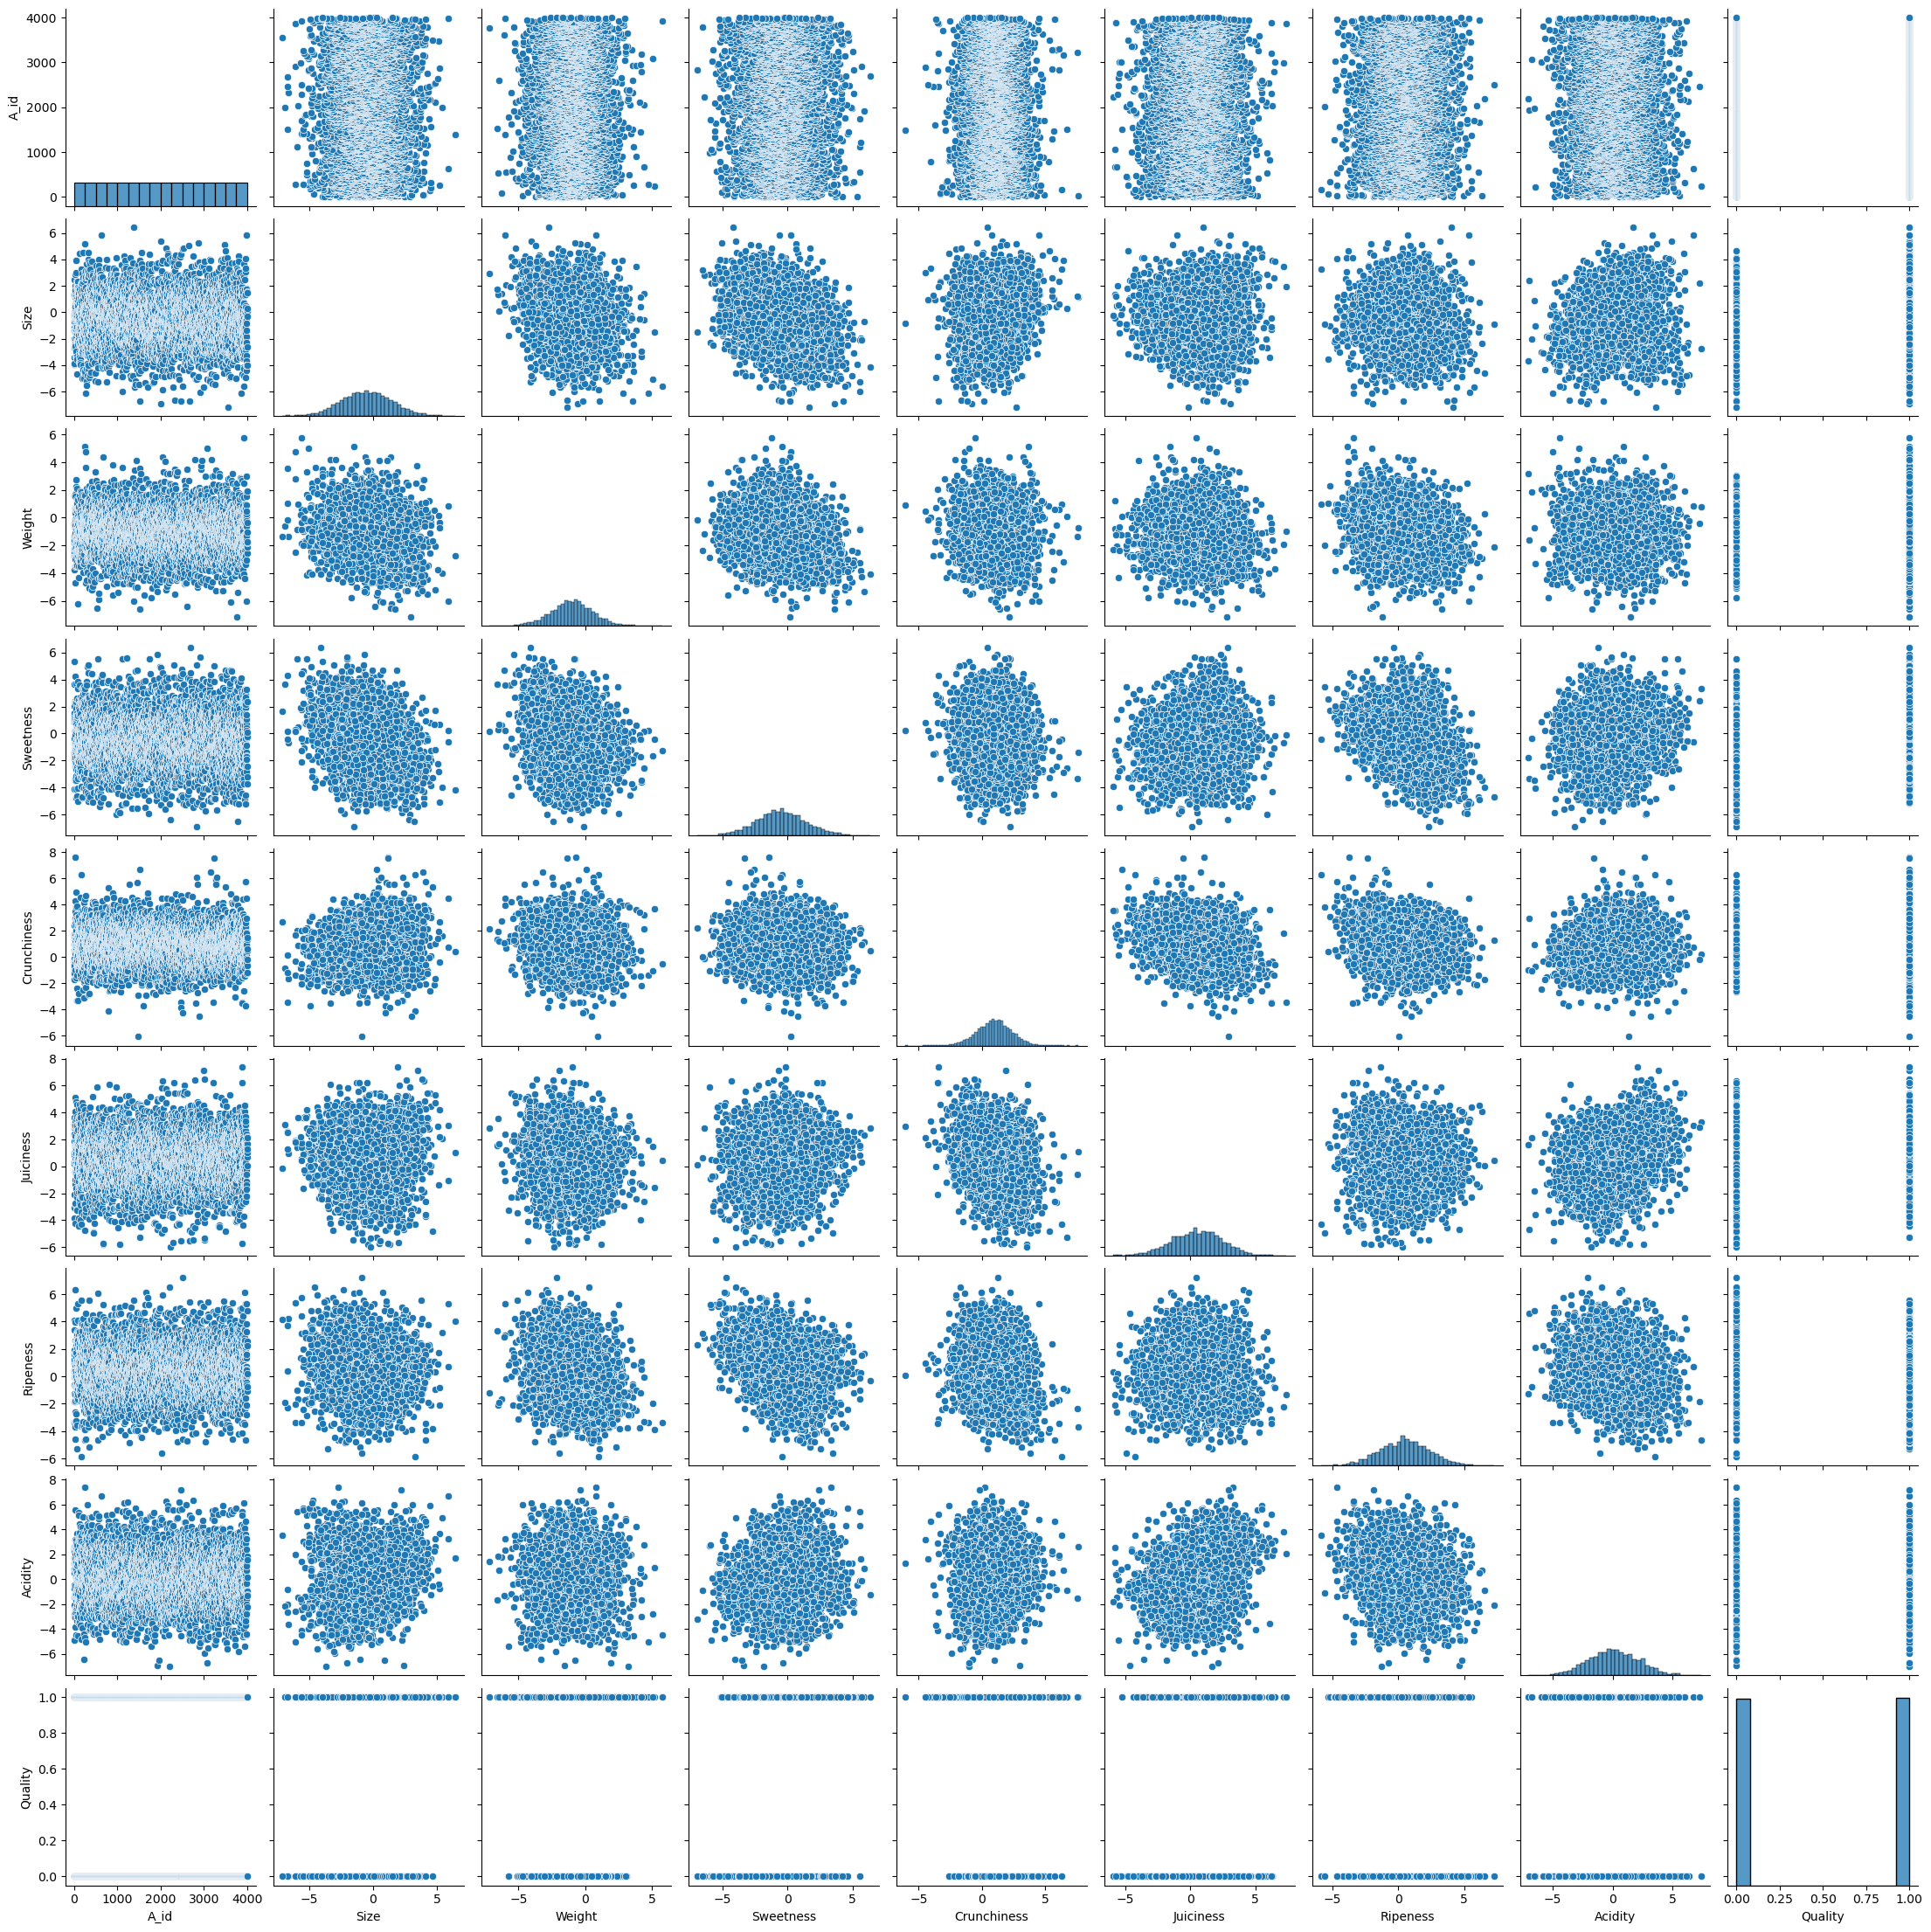

In [177]:
sns.pairplot(apples)